In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 要分析 用有關犯罪率的資料來能不能推測未來的犯罪率

In [237]:
#使用一個政府的網站裏面的實際資料
df=pd.read_csv('http://ipgod.nchc.org.tw/dataset/6b0bb933-b90e-42cd-8f12-31c9120e9bf8/resource/3a33e7f5-7366-45ac-813d-b3ca757b2333/download/a11000003f-000126-001.csv')
df=df.iloc[486:] #102年前後資料的算法不一樣 所以102開始做分析 
df = df[df['刑度']=='6月以下'] #分析中 主要判斷的是 6月一下的做來的資料。因爲從6月一下可以得到的資料最多， 所以比較容易比較每年的凶案件
df.head()

,刑度,性別,日期,統計值
492,6月以下,男性,10201,137
493,6月以下,女性,10201,54
494,6月以下,法人,10201,0
546,6月以下,男性,10202,84
547,6月以下,女性,10202,43


In [238]:
#這次的分析不分性別 所以 性別的列拿掉
df = df[['刑度','日期','統計值']] 
df.head()

,刑度,日期,統計值
492,6月以下,10201,137
493,6月以下,10201,54
494,6月以下,10201,0
546,6月以下,10202,84
547,6月以下,10202,43


In [239]:
#年份跟月來計算 
df = df['統計值'].groupby(df['日期'])
df = df.sum()

In [240]:
df.head()

日期
103      1935
104      1822
105      1497
10201     191
10202     127
Name: 統計值, dtype: int64

In [241]:
#爲了刪除上只有年份的最上面的三行 把資料再次改成DataFrame
df = pd.DataFrame(df)
df.head()

,統計值
日期,
103,1935
104,1822
105,1497
10201,191
10202,127


In [242]:
#再次刪掉上面103~105的總數來讓資料有一致性
df = df.iloc[3:]
#把移到Index的日期再次移到列。
df.reset_index(level=['日期'], inplace = True)
df.head()

,日期,統計值
0,10201,191
1,10202,127
2,10203,170
3,10204,153
4,10205,212


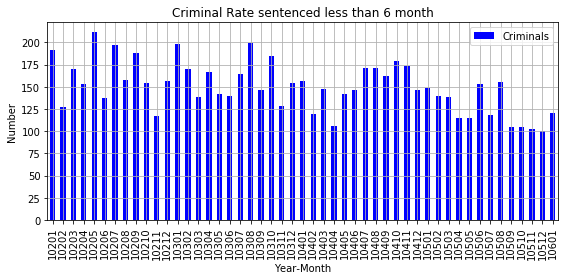

In [278]:
#先用Bar的圖形來看趨勢
dfp = df.plot.bar(x='日期', y='統計值', label = 'Criminals', color = 'b',figsize=(8,4))
dfp.set( xlabel= 'Year-Month', ylabel = 'Number', title = 'Criminal Rate sentenced less than 6 month')
plt.tight_layout()
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [244]:
#爲了scatter， 看看資料的大少
df.shape

(49, 2)

In [245]:
# 回歸之前 簡單的 前處理
year = df.iloc[:,0]                                          
number = df.iloc[:,1] 
x=np.array(year)
y=np.array(number)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)

In [273]:
# 資料切割的部分
from sklearn.model_selection import train_test_split
X = x.reshape(len(x), 1)
# 測試資料 【train :70 , test :30】
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

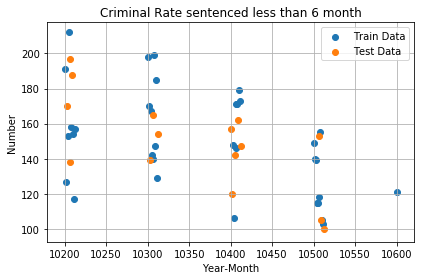

In [277]:
#先看看test跟train data長的如何
plt.scatter(x_train, y_train, label = 'Train Data')
plt.scatter(x_test, y_test, label = 'Test Data')
plt.xlabel('Year-Month')
plt.ylabel('Number')
plt.title('Criminal Rate sentenced less than 6 month')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# 完成回歸的分析

In [275]:
#製作一個回歸的機器
regr = LinearRegression()
# 訓練
regr.fit(x_train, y_train)
 # 預測
Y_pred = regr.predict(x_test)

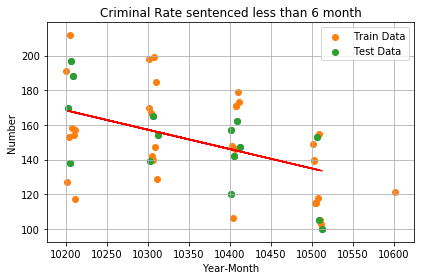

In [279]:
#圖畫出來
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')
plt.scatter(x_train, y_train, label = 'Train Data')
plt.scatter(x_test, y_test, label = 'Test Data')
plt.xlabel('Year-Month')
plt.ylabel('Number')
plt.title('Criminal Rate sentenced less than 6 month')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [280]:
#從上面的圖可以知道， 臺灣的犯罪率沒有每年增加 反而看到越來越減少的趨勢！是一個很安全的國家
#預測準確率跟 coefficient
print('Score=', regr.score(x_test,y_test))  
print('Coefficient=', regr.coef_)  

Score= 0.41704484409248976
Coefficient= [-0.11210476]
